## 폐병 수술 (Thoracic Surgery)
- 은닉층을 여러 개 층으로
- 학습과정을 시각화

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ThoracicSurgery.csv to ThoracicSurgery (1).csv


In [2]:
filename = list(uploaded.keys())[0]

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1], df.values[:,-1], stratify = df.values[:,-1], random_state=2022
)

- 모델 정의

In [6]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Sequential 함수는 딥러닝의 구조를 한 층 한층 쉽게 쌀아올릴 수 있게 해줌
# Sqquential 함수를 선언할 때 필요한 층을 차례로 추가하면 됨

In [8]:
model = Sequential([
    Dense(24, input_shape=(17,), activation='relu'),
    Dense(8, activation='relu'), # 24개의 아웃풋 층이니까 인풋은 없음
    Dense(1, activation='sigmoid') # 마지막 결과물이니까 activation = sigmoid
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                432       
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


- 모델 실행환경 설정

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# binary_crossentropy: 오차 함수 (이항 교차 엔트로피 ; 예측 값이 참 거짓 둘 중 하나인 경우 이거 사용하는 게 일반적)
# adam : 최적화 함수

- 모델 학습: 과정을 시각화하려면 history를 정의해야 함

In [10]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=40)
# 31/50 오히려 accuracy 줄어드니까 이때가 학습 종료해야되는 시점임
# callback : val_loss가 좋아지면 model save.
# early stopping : 베스트값보다 val_loss가 개선되지 않으면 중지
# batch_size : 샘플을 한 번에 몇 개씩 처리할지 정하는 부분
# epoch : 학습 프로세스가 모든 샘플에 대해 한번 실행하는 것.

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 8.1487 - accuracy: 0.8577 - val_loss: 7.1303 - val_accuracy: 0.8310
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 5.8957 - accuracy: 0.8577 - val_loss: 4.8440 - val_accuracy: 0.8310
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 3.6797 - accuracy: 0.8577 - val_loss: 2.6404 - val_accuracy: 0.8310
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 1.6342 - accuracy: 0.8363 - val_loss: 1.1487 - val_accuracy: 0.7042
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0706 - accuracy: 0.6762 - val_loss: 0.9133 - val_accuracy: 0.7324
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.7616 - val_loss: 0.8988 - val_accuracy: 0.7887
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8239 - accuracy: 0.8541 - val_loss: 1.0418 - val_accuracy: 0.8310
Epoch 8/50
8/8 [=================

In [11]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8220


[0.4805286228656769, 0.8220338821411133]

- 학습과정 시각화

In [12]:
type(history.history)

dict

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import matplotlib.pyplot as plt

In [15]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

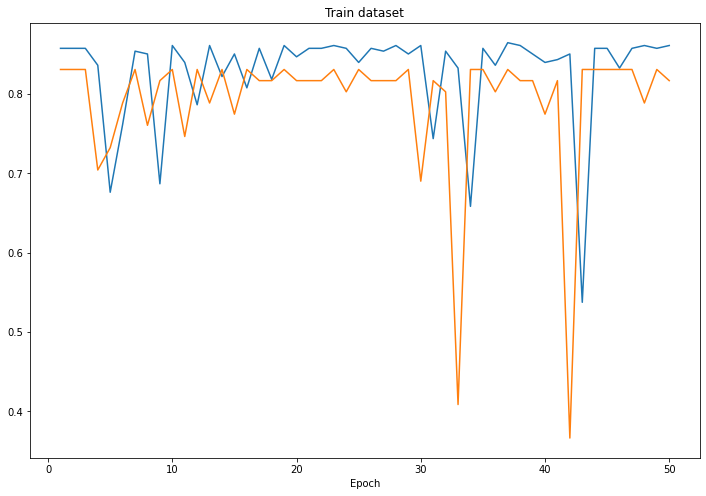

In [19]:
xs = np.arange(1,len(acc)+1) # 에포크가 1,2,3..이 나오니까 숫자 대응시키려고 +1 함
plt.figure(figsize=(12,8))
plt.plot(xs, acc, ms=5, label='train')
plt.plot(xs, val_acc, ms=5, label='validation')
plt.xlabel('Epoch')
plt.title('Train dataset')
plt.show()

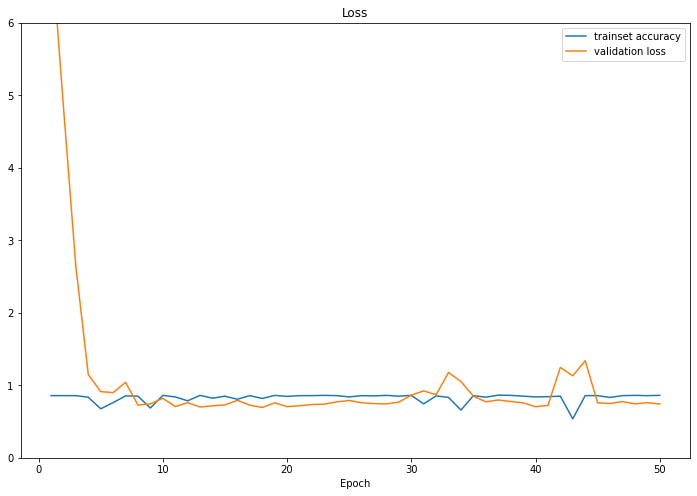

In [18]:
# 실전에서는 accuracy 값과 val_loss 값이 많이 그려짐
xs = np.arange(1,len(acc)+1) # 에포크가 1,2,3..이 나오니까 숫자 대응시키려고 +1 함
plt.figure(figsize=(12,8))
plt.plot(xs, acc, ms=10, label='trainset accuracy')
plt.plot(xs, val_loss, ms=10, label='validation loss')
plt.legend()
plt.ylim(0,6)
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()